# Lab_4 

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [8]:
digits = load_digits()

In [9]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [10]:
digits.images[:2]

array([[[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
        [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
        [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
        [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
        [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
        [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
        [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
        [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
        [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
        [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
        [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
        [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]]])

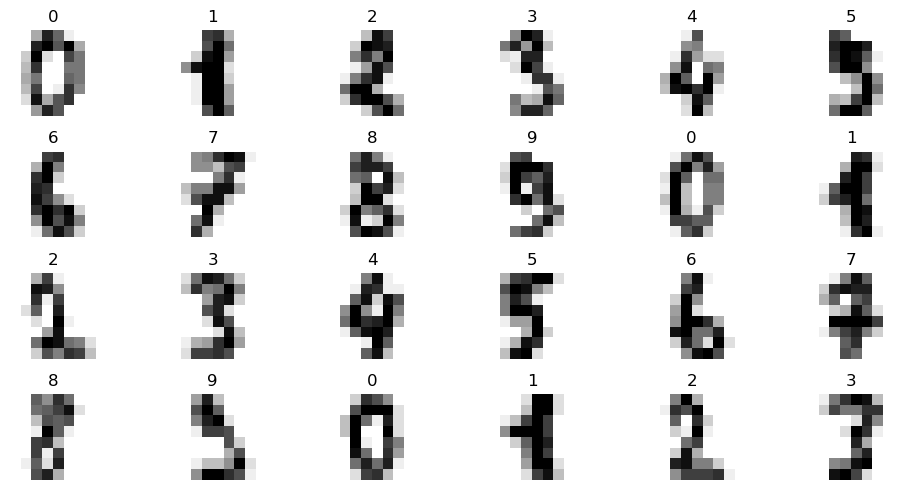

In [11]:
fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary')
    ax.set_title(digits.target[i])
    ax.axis('off')

plt.tight_layout()
plt.show()

## Building Models

### Data split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

In [14]:
X_train.shape

(1437, 64)

In [15]:
X_test.shape

(360, 64)

### KNN

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

predicted = knn.predict(X_test)
expected = y_test

In [20]:
predicted[:20]

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8])

In [21]:
expected[:20]

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8])

In [22]:
predicted[:24]

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7])

In [23]:
expected[:24]

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7])

In [24]:
predicted[:36]

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6])

In [25]:
expected[:36]

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6])

In [15]:
knn.score(X_test, y_test)

0.9861111111111112

#### Confusion matrix

In [16]:
from sklearn.metrics import confusion_matrix

In [17]:
confusion = confusion_matrix(y_true = expected, y_pred = predicted)
confusion

array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 34,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 46,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 45,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 35,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 30,  0],
       [ 0,  0,  0,  0,  1,  1,  0,  0,  0, 38]], dtype=int64)

#### Classification report

In [18]:
from sklearn.metrics import classification_report

In [19]:
names = [str(i) for i in digits.target_names]
print(classification_report(expected, predicted, target_names=names))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       0.98      1.00      0.99        46
           5       0.98      0.96      0.97        47
           6       0.97      1.00      0.99        35
           7       1.00      0.97      0.99        34
           8       1.00      1.00      1.00        30
           9       0.95      0.95      0.95        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



### SVC

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

In [21]:
clf = SVC()
clf.fit(X_train, y_train)

scores = cross_val_score(clf,digits.data, digits.target, cv=25, scoring='accuracy')
print(scores)
scores.mean()

[0.94444444 0.98611111 1.         1.         1.         0.98611111
 0.97222222 0.98611111 1.         1.         1.         0.98611111
 0.97222222 1.         1.         0.97222222 1.         1.
 0.98611111 1.         0.98611111 0.97222222 0.92957746 0.95774648
 0.98591549]


0.9849295774647888

### GaussianNB

In [22]:
from sklearn.naive_bayes import GaussianNB

In [23]:
clf = GaussianNB()
clf.fit(X_train, y_train)

scores = cross_val_score(clf,digits.data, digits.target, cv=25, scoring='accuracy')
print(scores)
scores.mean()

[0.77777778 0.77777778 0.83333333 0.79166667 0.83333333 0.88888889
 0.94444444 0.76388889 0.70833333 0.79166667 0.68055556 0.81944444
 0.75       0.98611111 0.875      0.81944444 0.875      0.88888889
 0.86111111 0.95833333 0.90277778 0.81944444 0.70422535 0.78873239
 0.88732394]


0.8291001564945226

## KNN Tuning

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
knn = KNeighborsClassifier()

params = {
    'n_neighbors': [i for i in range (1,10)],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree'],
    'leaf_size': [10, 20, 30],
    'p': [1, 2]
}
grid_search = GridSearchCV(knn, param_grid=params, cv=5)


grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
Best score: 0.9867789392179637
